In [1]:
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv("GOOG.csv", index_col="Date", parse_dates=True,)

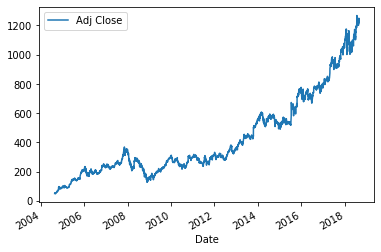

In [3]:
df[["Adj Close"]].plot()

In [4]:
df[["Volume"]]

,Volume
Date,
2004-08-19,44994500
2004-08-20,23005800
2004-08-23,18393200
2004-08-24,15361800
2004-08-25,9257400
...,...
2018-08-27,1156300
2018-08-28,1304000
2018-08-29,1298900


In [5]:
df2 = df[["Adj Close"]]

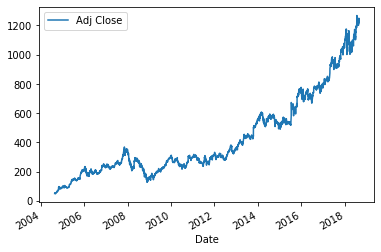

In [6]:
df2.plot()

In [7]:
def dfPlot(dataFrame,title="Stock prices"):
    ax = dataFrame.plot(title=title,fontsize=10)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")

In [8]:
#dfPlot(df2.rolling(window=20).mean())

In [9]:
start_date = '2017-01-01'
end_date = '2017-12-31'
dates = pd.date_range(start_date,end_date)

In [10]:
dfRollingMean = df2.rolling(window=20).mean()

In [11]:
dfRollingMean['2011-10-10':]

,Adj Close
Date,
2011-10-10,261.827811
2011-10-11,262.167104
2011-10-12,262.575199
2011-10-13,262.983295
2011-10-14,264.101026
...,...
2018-08-27,1223.497492
2018-08-28,1224.191992
2018-08-29,1225.656494


In [12]:
dfRollingMean

,Adj Close
Date,
2004-08-19,NaN
2004-08-20,NaN
2004-08-23,NaN
2004-08-24,NaN
2004-08-25,NaN
...,...
2018-08-27,1223.497492
2018-08-28,1224.191992
2018-08-29,1225.656494


In [13]:
df2

,Adj Close
Date,
2004-08-19,49.845802
2004-08-20,53.805050
2004-08-23,54.346527
2004-08-24,52.096165
2004-08-25,52.657513
...,...
2018-08-27,1241.819946
2018-08-28,1231.150024
2018-08-29,1249.300049


In [14]:
dfRollingMean.columns = ["Rolling Mean"]

In [15]:
dfRollingMean

,Rolling Mean
Date,
2004-08-19,NaN
2004-08-20,NaN
2004-08-23,NaN
2004-08-24,NaN
2004-08-25,NaN
...,...
2018-08-27,1223.497492
2018-08-28,1224.191992
2018-08-29,1225.656494


In [16]:
dfSTD = df2.rolling(window=20).std()

In [17]:
dfSTD

,Adj Close
Date,
2004-08-19,NaN
2004-08-20,NaN
2004-08-23,NaN
2004-08-24,NaN
2004-08-25,NaN
...,...
2018-08-27,15.848390
2018-08-28,15.865000
2018-08-29,16.783916


In [18]:
upperBand, lowerBand = get_bollinger_bands(dfRollingMean, dfSTD)

NameError: name 'get_bollinger_bands' is not defined

In [ ]:
upperBand

In [ ]:
upperBand.columns = ["Upper Band"]

In [ ]:
lowerBand.columns = ["Lower Band"]

In [ ]:
ax = df2.plot(title="Bollinger Bands")
dfRollingMean.plot(label='Rolling mean', ax=ax) #how to fix labels?
upperBand.plot(label='upper band', ax=ax)
lowerBand.plot(label='lower band', ax=ax)
anomDF.plot(style="*", x="Date" ,y="Price",  ax=ax)
anomDFhi.plot(style="*", x="Date" ,y="High Price",  ax=ax,color="r")
anomDFlo.plot(style="*", x="Date" ,y="Low Price",  ax=ax,color="b", figsize=(15,8))


ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper left')


In [ ]:
anL,anHL,anLL = markAnom(df2,upperBand,lowerBand)

In [ ]:
anomDF = pd.DataFrame(anL)
anomDFhi = pd.DataFrame(anHL)
anomDFlo = pd.DataFrame(anLL)

In [ ]:
anomDF.mean()

In [ ]:
anomDFlo

In [ ]:
anomDF["Date"] = pd.to_datetime(anomDF["Date"])

In [ ]:
anomDFhi["Date"] = pd.to_datetime(anomDFhi["Date"])

In [ ]:
anomDFlo["Date"] = pd.to_datetime(anomDFlo["Date"])

In [ ]:
result = (1234*115603)+1234

In [ ]:
result % 13

In [ ]:
pyStr = "Hello World"

In [ ]:
pyStr[0:2]

In [ ]:
pyStr[2:]

In [ ]:
def CreateBuillingerBands(df,startDate=None,endDate=None):
    
    if startDate and endDate:
        df = df[startDate:endDate]
    elif startDate:
        df = df[startDate:]
    
    
    dfRollingMean = df.rolling(window=20).mean()
    dfSTD = df.rolling(window=20).std()
    
    dfRollingMean.columns = ["Rolling Mean"]
    
    upperBand, lowerBand = get_bollinger_bands(dfRollingMean, dfSTD)
        
    upperBand.columns = ["Upper Band"]
    lowerBand.columns = ["Lower Band"]
    #print("Upper: {},Lower: {}".format(upperBand,lowerBand))

    anL,anHL,anLL = markAnom(df,upperBand,lowerBand)
    
    anomDF = pd.DataFrame(anL)
    anomDFhi = pd.DataFrame(anHL)
    anomDFlo = pd.DataFrame(anLL)
    
    #print(anomDFhi)
    #print(anomDF)
    #print(anomDFlo)
    
    anomDF["Date"] = pd.to_datetime(anomDF["Date"])
    anomDFhi["Date"] = pd.to_datetime(anomDFhi["Date"])
    anomDFlo["Date"] = pd.to_datetime(anomDFlo["Date"])
    
    ax = df.plot(title="Bollinger Bands")
    dfRollingMean.plot(label='Rolling mean', ax=ax) #how to fix labels?
    upperBand.plot(label='upper band', ax=ax)
    lowerBand.plot(label='lower band', ax=ax)
    anomDF.plot(style="*", x="Date" ,y="Price",  ax=ax)
    anomDFhi.plot(style="*", x="Date" ,y="High Price",  ax=ax,color="r")
    anomDFlo.plot(style="*", x="Date" ,y="Low Price",  ax=ax,color="b", figsize=(15,10))


    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='upper left')    

In [ ]:
def markAnom(df, upper_band, lower_band):
    anomList = list()
    hi_list = list()
    lo_list = list()
    for index, row in df.iterrows():
        #print("{}, {}".format(df.loc[index]["Adj Close"],upper_band.loc[index]["Upper Band"]))
        if df.loc[index]["Adj Close"] > upper_band.loc[index]["Upper Band"]:
            anomList.append({"Date" : index, "Price" : df.loc[index]["Adj Close"]})
            hi_list.append({"Date" : index, "High Price" : df.loc[index]["Adj Close"]})
        if df.loc[index]["Adj Close"] < lower_band.loc[index]["Lower Band"]:
            anomList.append({"Date" : index, "Price" : df.loc[index]["Adj Close"]})
            lo_list.append({"Date" : index, "Low Price" : df.loc[index]["Adj Close"]})
    return anomList, hi_list, lo_list

In [ ]:
def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band
    upper_band = rm['Rolling Mean'] + 2*(rstd['Adj Close'])
    lower_band = rm['Rolling Mean'] - 2*(rstd['Adj Close'])
    return upper_band.to_frame(), lower_band.to_frame()

In [ ]:
dfFB = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True,)

In [ ]:
CreateBuillingerBands(dfFB[["Adj Close"]],"2016-01-01","2016-12-31")

In [ ]:
!ls

In [21]:
dfAPPL = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True,)

In [43]:
dfAPPL.loc['2018-08-27']

Open         2.171500e+02
High         2.187400e+02
Low          2.163300e+02
Close        2.179400e+02
Adj Close    2.179400e+02
Volume       2.052510e+07
Name: 2018-08-27 00:00:00, dtype: float64

In [32]:
dfFB['Open']

Date
1980-12-12      0.513393
1980-12-15      0.488839
1980-12-16      0.453125
1980-12-17      0.462054
1980-12-18      0.475446
                 ...    
2018-08-27    217.149994
2018-08-28    219.009995
2018-08-29    220.149994
2018-08-30    223.250000
2018-08-31    226.509995
Name: Open, Length: 9513, dtype: float64